In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the train and test datasets
import pandas as pd

train_path = "/content/drive/MyDrive/train.csv"
test_path = "/content/drive/MyDrive/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text

train_df["text"] = train_df["text"].apply(clean_text)
test_df["text"] = test_df["text"].apply(clean_text)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))
train_x = ngram_vectorizer.fit_transform(train_df["text"])
test_x = ngram_vectorizer.transform(test_df["text"])
train_y = train_df["Y"]
test_y = test_df["Y"]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

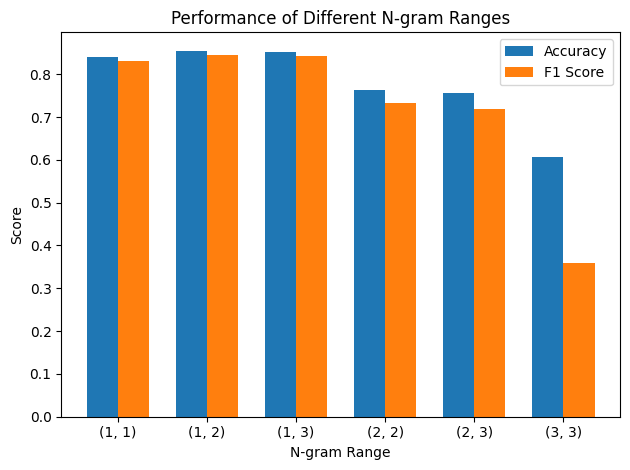

In [ ]:
# Import necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define a list of different n-gram ranges to try out
ngram_ranges = [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]

# Define a function to train an n-gram model and return accuracy and F1 scores
def train_ngram_model(ngram_range):
    # Create a CountVectorizer with the specified n-gram range
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    
    # Vectorize the text data in the train and test data frames
    X_train = vectorizer.fit_transform(train_df["text"])
    X_test = vectorizer.transform(test_df["text"])
    
    # Train a logistic regression model on the vectorized train data
    model = LogisticRegression()
    model.fit(X_train, train_df["Y"])
    
    # Predict the labels of the test data using the trained model
    y_pred = model.predict(X_test)
    
    # Calculate and return the accuracy and F1 scores
    accuracy = accuracy_score(test_df["Y"], y_pred)
    f1 = f1_score(test_df["Y"], y_pred)
    return accuracy, f1

# Train an n-gram model for each n-gram range and collect the accuracy and F1 scores
accuracies = []
f1_scores = []
for ngram_range in ngram_ranges:
    accuracy, f1 = train_ngram_model(ngram_range)
    accuracies.append(accuracy)
    f1_scores.append(f1)

# Plot a bar chart of the accuracy and F1 scores for each n-gram range
ngram_labels = [str(ngram_range) for ngram_range in ngram_ranges]
x = np.arange(len(ngram_ranges))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(ngram_labels)
ax.legend()
ax.set_xlabel("N-gram Range")
ax.set_ylabel("Score")
ax.set_title("Performance of Different N-gram Ranges")
fig.tight_layout()
plt.show()

In [ ]:
# Create a CountVectorizer with the (1, 2) n-gram range
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Vectorize the text data in the train and test data frames
X_train = vectorizer.fit_transform(train_df["text"])
X_test = vectorizer.transform(test_df["text"])

# Train a logistic regression model on the vectorized train data
model = LogisticRegression(max_iter=10000, random_state=42, solver='lbfgs', n_jobs=-1, penalty='l2', C=0.5, class_weight='balanced', verbose=1)
model.fit(X_train, train_df["Y"])

# Make predictions on the vectorized test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

# Calculate the accuracy and F1 score of the final model
accuracy = accuracy_score(test_df["Y"], y_pred)
precision = precision_score(test_df["Y"], y_pred)
recall = recall_score(test_df["Y"], y_pred)
f1 = f1_score(test_df["Y"], y_pred)
auc_roc = roc_auc_score(test_df["Y"], y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC Score:", auc_roc)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.8517353831819241
Precision: 0.8444171779141104
Recall: 0.8433823529411765
F1-Score: 0.8438994481912937
AUC-ROC Score: 0.927233079205939


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.2s finished


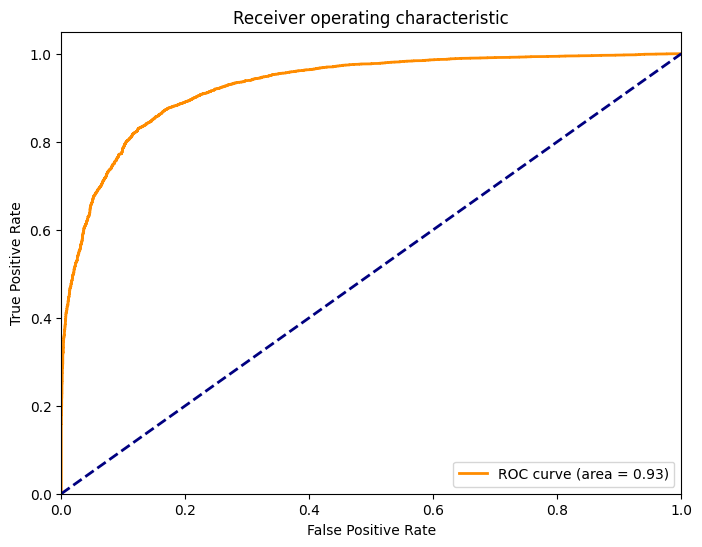

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(test_df["Y"], y_pred_proba)

# Calculate the AUC-ROC score
roc_auc = auc(fpr, tpr)

# Plot the AUC-ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text

# Sample input text
input_text = "Well, that was a brilliant idea. I'm surprised Einstein himself didn't think of it first"

# Clean the input text
clean_input_text = clean_text(input_text)

# Vectorize the cleaned input text using the ngram_vectorizer
input_vector = ngram_vectorizer.transform([clean_input_text])

# Make a prediction using the trained logistic regression model
prediction = model.predict(input_vector)

# Convert prediction to human-readable form
if prediction[0] == 0:
  prediction_text = "not a sarcastic sentence"
else:
  prediction_text = "yes, it is a sarcastic sentence"

# Print the result in the desired format
print("Sentence: ", input_text)
print("Prediction: ", prediction_text)


Sentence:  Well, that was a brilliant idea. I'm surprised Einstein himself didn't think of it first
Prediction:  yes, it is a sarcastic sentence


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text

# Sample input text
input_text = "Oh wow, thanks for letting me know that I'm doing it wrong after I've already done it. I'll definitely keep that in mind for next time"

# Clean the input text
clean_input_text = clean_text(input_text)

# Vectorize the cleaned input text using the ngram_vectorizer
input_vector = ngram_vectorizer.transform([clean_input_text])

# Make a prediction using the trained logistic regression model
prediction = model.predict(input_vector)

# Convert prediction to human-readable form
if prediction[0] == 0:
  prediction_text = "not a sarcastic sentence"
else:
  prediction_text = "yes, it is a sarcastic sentence"

# Print the result in the desired format
print("Sentence: ", input_text)
print("Prediction: ", prediction_text)

Sentence:  Oh wow, thanks for letting me know that I'm doing it wrong after I've already done it. I'll definitely keep that in mind for next time
Prediction:  yes, it is a sarcastic sentence
